### Student Information
Name: 鄭家合 (Tee Jia He)

Student ID: 110033405

GitHub ID: AnthonyTeeJH

Kaggle name: Tee Jia He (JH in the competition)

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

---
## _First Part: Take Home Exercise_

In [2]:
### Begin Assignment Here

In [3]:
import pandas as pd

### training data: Reading tab-delimited file
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# shuffle dataset(frac=1)
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


In [15]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

### Exercise 1
Plot word frequency for Top 30 words in both train and test dataset.

In [5]:
# Answer here
import numpy as np
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer

# Feature Subset Selection
train_count_vect = CountVectorizer()
test_count_vect = CountVectorizer()
train_dataset_counts = train_count_vect.fit_transform(train_df.text)
test_dataset_counts = test_count_vect.fit_transform(test_df.text)

# Attribute Transformation/ Aggregation (Frequency of word/ term being used)
train_term_frequencies = np.asarray(train_dataset_counts.sum(axis=0))[0]
test_term_frequencies = np.asarray(test_dataset_counts.sum(axis=0))[0]

print(train_dataset_counts.shape)
print(test_dataset_counts.shape)

(3613, 10115)
(347, 1949)


Train Dataset: Top 30 Words Frequency

In [6]:
df = pd.DataFrame(train_term_frequencies[:30])
tf = pd.DataFrame((df).values,index=train_count_vect.get_feature_names_out()[:30], columns={"term_frequency"})
fig = px.line(tf, y="term_frequency", x=train_count_vect.get_feature_names_out()[:30])
fig.show()

Test Dataset: Top 30 Words Frequency

In [8]:
df = pd.DataFrame(test_term_frequencies[:30])
tf = pd.DataFrame((df).values,index=test_count_vect.get_feature_names_out()[:30], columns={"term_frequency"})
fig = px.line(tf, y="term_frequency", x=test_count_vect.get_feature_names_out()[:30])
fig.show()

### Exercise 2
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [9]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Word Embedding using TF-IDF (top 1000 max features)
TFIDF1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
TFIDF1000.fit(train_df['text'])
train_data_TFIDF_features_1000 = TFIDF1000.transform(train_df['text'])

## check dimension
print(train_data_TFIDF_features_1000.shape)

c:\Users\JiaHe\DeepLearning_Project\deep_learning\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 1000)


In [10]:
# observe some feature names
feature_names_1000 = TFIDF1000.get_feature_names_out()
feature_names_1000[100:110]

array(['b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday',
       'be'], dtype=object)

### Exercise 3

![Confusion Matrix](\img\output1.png "Confusion Matrix")

Can you interpret the results above? What do they mean?

From the results, it can be shown that:
* 58 out of 90 of data labelled 'anger' predicted correctly, thus accuracy = 0.644
* 74 out of 114 of data labelled 'fear' predicted correctly, thus accuracy = 0.649
* 52 out of 76 of data labelled 'joy' predicted correctly, thus accuracy = 0.684
* 44 out of 67 of data labelled 'sadness' predicted correctly, thus accuracy = 0.657
* The model possesses higher accuracy in predicting data labelled 'joy' compared to the others.
* Normally people (or just me) will conclude that the model can predict data labelled 'fear' better from their first sight since the color is darken than others but it's wrong.

Besides, we can know that which type of data is more similar to each other from the counts of error prediction. For instance, data labelled 'fear' is more similar to data labelled 'angry', where 16 out of 84 of data predicted as 'anger' is actually 'fear'. It can be observed that data labelled 'fear' is less distinguishable among the datasets since the counts of error predicted in other 3 classes are quite balance and a little bit high. 


### Exercise 4
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

Since the training dataset fed to the Decision Tree model was processed (word embedding) using CountVectorizer, then the same settings should be done too in training Naive Bayes model in order to compare them.

In [11]:
# build analyzers (bag-of-words) (build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
print(train_data_BOW_features_500.shape)

(3613, 500)


Multinomial Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB

# training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# build Multinomial Naive Bayes model
NB_model = MultinomialNB()

# training
NB_model = NB_model.fit(X_train, y_train)

# predict
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

# observe some predict results
y_test_pred[:10]

array(['anger', 'sadness', 'fear', 'joy', 'anger', 'sadness', 'fear',
       'sadness', 'joy', 'anger'], dtype='<U7')

In [13]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [14]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



[[56 14  5  9]
 [ 9 85  5 11]
 [10  8 55  6]
 [12 10  6 46]]


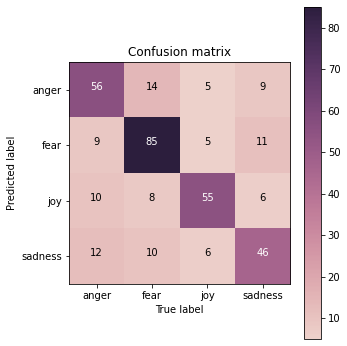

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

# plot confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

Gaussian Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

# build Gaussian Naive Bayes model
NB_model = GaussianNB()

# training
NB_model = NB_model.fit(X_train.toarray(), y_train)

# predict
y_train_pred = NB_model.predict(X_train.toarray())
y_test_pred = NB_model.predict(X_test.toarray())

# observe some predict results
y_test_pred[:10]

array(['anger', 'anger', 'fear', 'joy', 'anger', 'anger', 'fear', 'anger',
       'joy', 'fear'], dtype='<U7')

In [19]:
# accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.76
testing accuracy: 0.64


From the result (testing accuracy), it can be shown that the dataset follows Multinomial distribution more than Gaussian distribution, thus Multinomial Naive Bayes is used.

### Exercise 5
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Compare Decision Tree and Multinomial Naive Bayes:

| Accuracy | Decision Tree | Multinomial Naive Bayes |
|----------|:-------------:|:-----------------------:|
| Training |      0.99     |           0.79          |
|  Testing |      0.66     |           0.7           |

From the above accuracy results, it can be shown that Decision Tree achieved a very high training accuracy (0.99) while training accuracy of Multinomial Naive Bayes was lower (0.79). The reason is as below:
* Decision Tree model **construct rules from the training dataset**, by partitioning the datasets based on selected attributes (Decision Tree induction), thus it's normal to observe a very high training accuracy (0.99) because it can be imagined that the tree was just reflecting the whole training dataset.
* Training accuracy of 0.79 is a normal and standard result achieved by a Naive Bayesian classifier because Naive Bayesian classifier works on an important assumption, which is class conditional independence. Practically, dependencies exist among variables, thus the dependencies in this case cannot modeled by the Naive Bayesian classifier.

Despite the lower training accuracy, Multinomial Naive Bayes classifier achieved slightly higher accuracy in predicting test data than that of Decision Tree classifier (0.7 vs 0.66). It's expected since Naive Bayesian Classifier generally works particularly well with natural language processing (NLP) problems such as to predict the tag of a text (like a piece of news or a customer review).

From the confusion matrix, it can be observed that the performance of Multinomial Naive Bayes classifier was about the same as compared to Decision Tree classifier except in predicting data labelled 'fear'. Multinomial Naive Bayes classifier can distinguish data labelled 'fear' among the data labelled 'angry' & 'joy' better than decision Tree classifier. It's shown that probability theory works better in distinguising these data.

### Exercise 6
Plot the Training and Validation Accuracy and Loss (different plots).

In [23]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [24]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
# print('check label: ', label_encoder.classes_)
# print('\n## Before convert')
# print('y_train[0:4]:\n', y_train[0:4])
# print('\ny_train.shape: ', y_train.shape)
# print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

# print('\n\n## After convert')
# print('y_train[0:4]:\n', y_train[0:4])
# print('\ny_train.shape: ', y_train.shape)
# print('y_test.shape: ', y_test.shape)


In [25]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [26]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                 0     

In [27]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


c:\Users\JiaHe\DeepLearning_Project\deep_learning\lib\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning:

Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.



113/113 [==============================] - 1s 5ms/step - loss: 1.3296 - accuracy: 0.3629 - val_loss: 1.2988 - val_accuracy: 0.4035
Epoch 2/25
113/113 [==============================] - 0s 3ms/step - loss: 1.0085 - accuracy: 0.6280 - val_loss: 0.9614 - val_accuracy: 0.6427
Epoch 3/25
113/113 [==============================] - 0s 3ms/step - loss: 0.5961 - accuracy: 0.7858 - val_loss: 0.8042 - val_accuracy: 0.6945
Epoch 4/25
113/113 [==============================] - 0s 4ms/step - loss: 0.4223 - accuracy: 0.8456 - val_loss: 0.8174 - val_accuracy: 0.6888
Epoch 5/25
113/113 [==============================] - 0s 4ms/step - loss: 0.3367 - accuracy: 0.8885 - val_loss: 0.8766 - val_accuracy: 0.6542
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2848 - accuracy: 0.9031 - val_loss: 0.8714 - val_accuracy: 0.6801
Epoch 7/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2280 - accuracy: 0.9231 - val_loss: 0.9398 - val_accuracy: 0.6686
Epoch 8/25
113/11

Plot of Training & Validation Accuracy

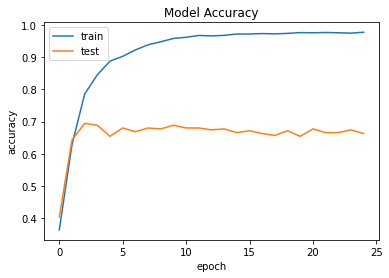

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plot of Training & Validation Loss

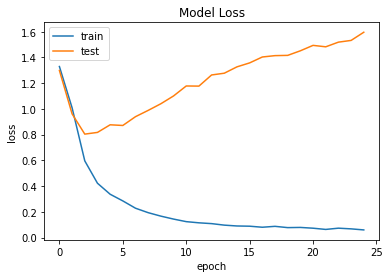

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Exercise 7
Now, we have the word vectors, but our input data is a sequence of words (or say sentence). How can we utilize these "word" vectors to represent the sentence data and train our model?

Several applications of word vectors generation technique (Word2Vec/ Glove) can be implemented to generate "sentence" vectors to represent each sentence as following:
* **Doc2Vec**: Doc2Vec is an application of Word2Vec that takes the tool and expands it to be used on entire document, such as an article. In the simplest form, “naive” Doc2Vec takes the word vectors of every word in text and aggregates them together by taking a normalized sum or arithmetic mean of the terms. 
* **Average of Word Vectors**: Take the average/ sum of the constituent word vectors in a sentence. However, this is akin to the bag-of-words representation, and hence suffers from the same limitations, i.e., ignores the order of words, ignores the sentence semantics completely.
* **Average of Word Vectors with TF-IDF**: Multiply each word vectors by their TF-IDF scores and take the average/ sum of the multiplied word vectors in a sentence. Similarly, this approach can give an importance to the rarity of words in the sentence and therefore an perform better than the above approaches.

### Exercise 8
Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [35]:
from gensim.models import KeyedVectors

# Load pre-trained google model
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [36]:
# Clustering target words list
word_list = ['angry', 'happy', 'sad', 'fear']

# Obtain 15 words most related to each target word
topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]      

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words+ happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

c:\Users\JiaHe\DeepLearning_Project\deep_learning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\JiaHe\DeepLearning_Project\deep_learning\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

c:\Users\JiaHe\DeepLearning_Project\deep_learning\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.



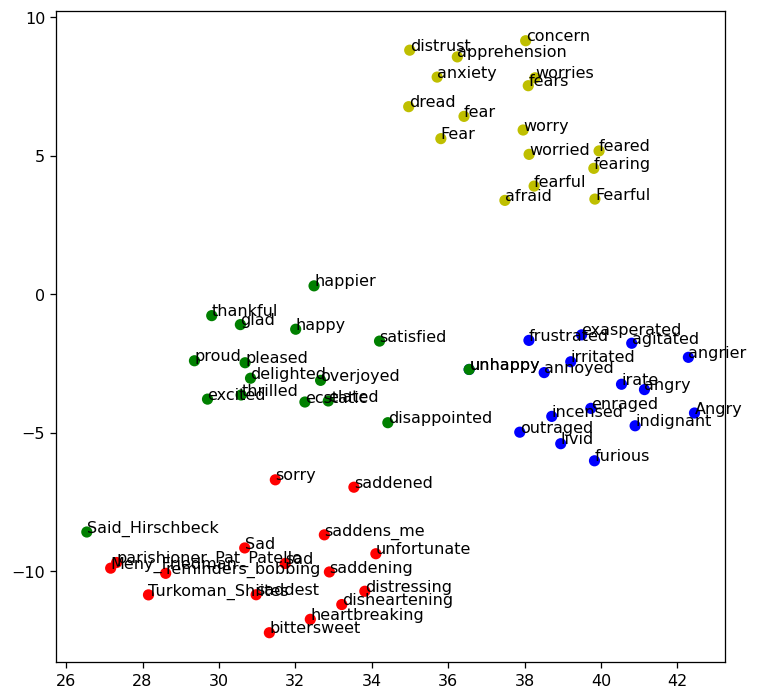

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 600
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

From the plot, it can be clearly seen that there's outliers such as 'Said_Hirschbeck', 'disappointed', 'unhappy' for the cluster belongs to word 'happy'. It's expected since we know that 'unhappy' is the opposite of 'happy' (more similar to 'angry' according to the plot), and 'disappointed' can be either belong to the cluster of 'angry' or 'sad' while 'Said_Hirschbeck' is totally not related to 'happy'. 

---
## _Second/ Third Part: Kaggle Competition (Emotion Recognition on Twitter)_
In this part, I will try my best to show the journey/ process I underwent in working on this competition as clear as possible. The following will be most of the things I have tried and experimented with.

### Load Raw Data (json file)

In [1]:
import pandas as pd

path_to_json = 'data/'
json_name = 'tweets_DM.json'

# Raw data from Twitter: json file to dataframe
RawData_df = pd.read_json(path_to_json + json_name, lines=True)
print("Shape of Twitter raw data (json): ", RawData_df.shape)
print(RawData_df.info())
RawData_df.head()

Shape of Twitter raw data (json):  (1867535, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867535 entries, 0 to 1867534
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   _score      int64 
 1   _index      object
 2   _source     object
 3   _crawldate  object
 4   _type       object
dtypes: int64(1), object(4)
memory usage: 71.2+ MB
None


,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets


### Load Raw Data (csv file)

In [2]:
path_to_csv = 'data/'

# Lists the emotion labels per tweet_id: csv file to dataframe
emotion_df = pd.read_csv(path_to_csv + 'emotion.csv', sep=",", header=0)
print("Shape of emotion_df: ", emotion_df.shape)
print(emotion_df.info())
emotion_df.head()

Shape of emotion_df:  (1455563, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455563 entries, 0 to 1455562
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   tweet_id  1455563 non-null  object
 1   emotion   1455563 non-null  object
dtypes: object(2)
memory usage: 22.2+ MB
None


,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


In [3]:
# A file that identifies membership of training or testing set per tweet_id. 
data_identification_df = pd.read_csv(path_to_csv + 'data_identification.csv', sep=",", header=0)
print("Shape of data_identification_df: ", data_identification_df.shape)
print(data_identification_df.info())
data_identification_df.head()

Shape of data_identification_df:  (1867535, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867535 entries, 0 to 1867534
Data columns (total 2 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tweet_id        object
 1   identification  object
dtypes: object(2)
memory usage: 28.5+ MB
None


,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


It can be observed that the provided csv file datasets (emotion, data_identification) are well-organized and ready to be used. However, the situation is quite complex in the case of raw data from Twitter since normally it's more challenging to deal with json file as compared to csv file. We can observe that there is a large amount of data and only 1 out of 4 features seems to be useful for us. Thus, we need to drop unimportant columns and select the task-relevant data.

### Data Selection from Twitter Raw Data

In [4]:
# We only need the third column ('_source')
useful_dataset_df = RawData_df.iloc[:, 2]
useful_dataset_df.head()

0    {'tweet': {'hashtags': ['Snapchat'], 'tweet_id...
1    {'tweet': {'hashtags': ['freepress', 'TrumpLeg...
2    {'tweet': {'hashtags': ['bibleverse'], 'tweet_...
3    {'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...
4    {'tweet': {'hashtags': [], 'tweet_id': '0x2de2...
Name: _source, dtype: object

In [5]:
print(useful_dataset_df[0].keys())

dict_keys(['tweet'])


In [6]:
print(useful_dataset_df[0]['tweet'].keys())

dict_keys(['hashtags', 'tweet_id', 'text'])


It can be seen that the third column ('_source') is just a set of dictionary data with only 1 key 'tweet'. Besides, the value corresponding to the key 'tweet' is just another dict data with 3 keys 'hashtags', 'tweet_id', 'text'. In my opinion, only 'tweet_id' and 'text' features are useful to us because there's a lot of missing values in the 'hashtags' feature and even there's value but mostly might not be useful in classifying emotion (normally hashtags of a post can be location, name of people/ event...). Therefore, I will only select the 'tweet_id' and 'text' features from the raw json file to save more time and memory for later data manipulation & calculation.

In [7]:
# Extract tweet_id and the texts corresponding to each tweet_id
text = []
tweet_id = []

for element in useful_dataset_df:
    id = element['tweet']['tweet_id']
    tweet_id.append(id)
    tweet_text = element['tweet']['text']
    text.append(tweet_text)

alldata = zip(tweet_id, text)
selected_dataset_df = pd.DataFrame(alldata, columns=['tweet_id', 'text'])
print("Shape of selected_dataset_df: ", selected_dataset_df.shape)
print(selected_dataset_df.info())
selected_dataset_df.head()

Shape of selected_dataset_df:  (1867535, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867535 entries, 0 to 1867534
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   tweet_id  object
 1   text      object
dtypes: object(2)
memory usage: 28.5+ MB
None


,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."


### Data Integration
In this part, I will integrate the information from the data available (emotion, data_identification_df, selected_dataset_df) based on their common key variable - tweet_id, in order to obtain train dataset and test dataset for our task - emotion classification.

First, separate the train and test data:

In [8]:
# Extract the tweet_id corresponds to data labelled 'train' and 'test'
train_id = data_identification_df.loc[data_identification_df["identification"] == "train"]
test_id = data_identification_df.loc[data_identification_df["identification"] == "test"]

# Separate the selected_dataset_df into train_df and test_df based on the extracted train_id and test_id
train_df = selected_dataset_df.loc[selected_dataset_df.tweet_id.isin(train_id['tweet_id'])]
train_df.reset_index(drop=True, inplace=True)
print("There are " + str(train_df.shape[0]) + " of data labelled 'train'.")

test_df = selected_dataset_df.loc[selected_dataset_df.tweet_id.isin(test_id['tweet_id'])]
test_df.reset_index(drop=True, inplace=True)
print("There are " + str(test_df.shape[0]) + " of data labelled 'test'.")

There are 1455563 of data labelled 'train'.
There are 411972 of data labelled 'test'.


Then, it's time to provide the emotion label of each train data based on their tweet_id:

In [9]:
# Set the index of emotion_df to be 'tweet_id'
emotion_df = emotion_df.set_index('tweet_id')
# Sort the index(rows) of emotion_df according to the 'tweet_id' of train_df, so that merging can be done directly.
emotion_df = emotion_df.reindex(index=train_df['tweet_id'])
emotion_df = emotion_df.reset_index()
print("Sorted emotion_df:")
print(emotion_df.head())
print("Train_df: ")
print(train_df.head())

Sorted emotion_df:
   tweet_id       emotion
0  0x376b20  anticipation
1  0x2d5350       sadness
2  0x1cd5b0          fear
3  0x1d755c           joy
4  0x2c91a8  anticipation
Train_df: 
   tweet_id                                               text
0  0x376b20  People who post "add me on #Snapchat" must be ...
1  0x2d5350  @brianklaas As we see, Trump is dangerous to #...
2  0x1cd5b0                Now ISSA is stalking Tasha 😂😂😂 <LH>
3  0x1d755c  @RISKshow @TheKevinAllison Thx for the BEST TI...
4  0x2c91a8       Still waiting on those supplies Liscus. <LH>


In [10]:
# Join the 'emotion' column of emotion_df to train_df directly
train_df = train_df.join(emotion_df.emotion)
train_df.head()

,tweet_id,text,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation


In [63]:
# save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

## **Exploratory Data Analysis**
Since task-relavant data is extracted, EDA will be implemented to have a better understanding of the train data.

In [11]:
# Check train_df for once more
print(train_df.info())
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455563 entries, 0 to 1455562
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   tweet_id  1455563 non-null  object
 1   text      1455563 non-null  object
 2   emotion   1455563 non-null  object
dtypes: object(3)
memory usage: 33.3+ MB
None


,tweet_id,text,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation


### Check Missing & Duplicate Values

Missing Values:

In [12]:
import helpers.data_mining_helpers as dmh
# check train_df
train_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,tweet_id,text,emotion
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [13]:
# check test_df
test_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,tweet_id,text
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


Duplicate Values:

In [14]:
# check train_df
print("Sum of duplicates values in train_df: ", sum(train_df.duplicated()))
# check test_df
print("Sum of duplicates values in test_df: ", sum(test_df.duplicated()))

Sum of duplicates values in train_df:  0
Sum of duplicates values in test_df:  0


### Data Cleaning
To increase the overall productivity and allow for the highest quality information in decision-making. In short, it will highlight the key attributes suitable for the classifier.

In [15]:
import re

# define a function to clean the text data
def data_cleaning(df):
    # Remove html markup
    Cleaned_text = df.text.apply(lambda x: re.sub("(<.*?>)", "", x))
    print("Before remove html markup:", df.text[199992])
    print("After remove html markup:", Cleaned_text[199992])
    print()

    # Remove URLs
    print("Before remove URLs:", Cleaned_text[213288])
    Cleaned_text = Cleaned_text.apply(lambda x: re.sub(r'Http\S+', '', x))
    print("After remove URLs:", Cleaned_text[213288])
    print()

    # Remove hashtags
    print("Before remove hashtags:", Cleaned_text[1])
    Cleaned_text = Cleaned_text.apply(lambda x: re.sub(r"(#[\d\w\.]+)", '', x))
    print("After remove hashtags:", Cleaned_text[1])
    print()

    # Remove @names
    print("Before remove @names:", Cleaned_text[1])
    Cleaned_text = Cleaned_text.apply(lambda x: re.sub(r"(@[\d\w\.]+)", '', x))
    print("After remove @names:", Cleaned_text[1])
    print()

    # Remove punctuation and non-ascii digits such as emojis
    print("Before remove punctuation and emoji:", Cleaned_text[213412])
    Cleaned_text = Cleaned_text.apply(lambda x: re.sub("(\\W|\\d)", " ", x))
    print("After remove punctuation and emoji:", Cleaned_text[213412])
    print()

    # Remove whitespace
    Cleaned_text = Cleaned_text.apply(lambda x: x.strip())
    
    return Cleaned_text

In [16]:
train_df['cleaned_text'] = data_cleaning(train_df)
train_df.head()

Before remove html markup: I want to eat my words <LH>
After remove html markup: I want to eat my words 

Before remove URLs:  the children. Watch techies play games for the children. Http://extralife/thehumangeo.com. My favorite-Anne. Thanks!
After remove URLs:  the children. Watch techies play games for the children.  My favorite-Anne. Thanks!

Before remove hashtags: @brianklaas As we see, Trump is dangerous to #freepress around the world. What a   #TrumpLegacy.  #CNN
After remove hashtags: @brianklaas As we see, Trump is dangerous to  around the world. What a     

Before remove @names: @brianklaas As we see, Trump is dangerous to  around the world. What a     
After remove @names:  As we see, Trump is dangerous to  around the world. What a     

Before remove punctuation and emoji: If the heartbreak happens in the day, will it heal faster tho? (refer previous tweet) ha ha 
After remove punctuation and emoji: If the heartbreak happens in the day  will it heal faster tho   refer pre

,tweet_id,text,emotion,cleaned_text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation,People who post add me on must be dehydrate...
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness,As we see Trump is dangerous to around the w...
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear,Now ISSA is stalking Tasha
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy,Thx for the BEST TIME tonight What stories H...
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation,Still waiting on those supplies Liscus


It's shown that the cleaned_text is left only the plained text and is much tidy than original text. However, over-cleaning (loss some unexpected important features) might happen and I suspected that remove hashtags and emojis might lead to negative impact, thus few experiments had been conducted to compare the performance (f1 score) between MLP model trained with:
* train data with emojis/ hashtags removed
* train data without emojis/ hashtags removed

The experiment results shown that the performance (f1 score) will be better if emojis are kept, while slightly better if hashtags are kept. This result is reasonable since:
* The primary function of emoji is to aid in emphasizing the emotion.
* Hashtags can be useful in classifying emotion in some cases (if the user expresses her/his emotion using hashtags), but might be meaningless if the hashtag is some kind of name.

Therefore, I didn't remove the emojis and hashtags in my final testing.

### Data Visualization
To have a better observation on the data distribution.

In [17]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

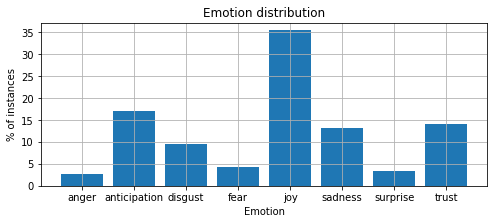

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(8,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

From the plot, it can be observed that there is an uneven distribution of data - Imbalanced Data, where the majority (joy) class’s presence is much higher than the minority (anger) class. If this problem is not handled properly, it can be expected that the trained classifier will make biased prediction towards the majority class while the minority class will be less predicted. In the next part, I will try to deal with it.

### Data Undersampling/ Oversampling

Undersampling technique resamples the majority class points in the data to make them equal to the minority class points, large amount of data from majority class
dataset are removed randomly. However, the major disadvantage of this simple technique is that we do not use a significant chunk of training dataset, which may contain important
information. In this case, most data will be sacrificed since the majority class's presence is much higher than the minority class (516017 vs 39867), which in turn almost all information will be removed. As a result, only 318936 data are preserved which 1136627 precious data are removed and there will be a very high chances of underfitting. Therefore, I will not use undersampling technique in the final test.

In contrast to undersampling, oversampling refers to the resampling of the minority class points to equal the total number of majority points.

Repetition of the minority class point is one such type of oversampling technique. However, the number of majority class (joy) points is 516017 so the total number of data points will be very large (516017 x 8 = 4128136) if we resampling all the minority classes to equal the total number of majority (joy) points, which will lead to the curse of dimensionality. This had been proven when I tried to use the very large resampling train data to train the model such as Random Forest, MLP and etc, the training time is very long (hundreds of minutes) but the result was not better/ even slightly worse than the case of using original train data to train the model.

Thus, I tried to bring in the undersampling technique to make the majority class points lesser, then resampling all the minority classes, as following:

In [19]:
# First, partition dataset according to their label
data_label_anger = np.array(train_df.query("emotion == 'anger'"))
data_label_anticipation = np.array(train_df.query("emotion == 'anticipation'"))
data_label_disgust = np.array(train_df.query("emotion == 'disgust'"))
data_label_fear = np.array(train_df.query("emotion == 'fear'"))
data_label_joy = np.array(train_df.query("emotion == 'joy'"))
data_label_sadness = np.array(train_df.query("emotion == 'sadness'"))
data_label_surprise = np.array(train_df.query("emotion == 'surprise'"))
data_label_trust = np.array(train_df.query("emotion == 'trust'"))

Make the number of data for each class balanced (at around 20k).
* Oversampling (repetition) for minority class
* Undersampling for majority class ()
* No changes for the class anticipation, sadness and trust

In [20]:
# Oversampling (Repetition)
data_label_anger_oversampling = np.concatenate((data_label_anger, data_label_anger, data_label_anger, data_label_anger, data_label_anger, data_label_anger), axis=0)

data_label_disgust_oversampling = np.concatenate((data_label_disgust, data_label_disgust), axis=0)

data_label_fear_oversampling = np.concatenate((data_label_fear, data_label_fear, data_label_fear, data_label_fear), axis=0) 

data_label_surprise_oversampling = np.concatenate((data_label_surprise, data_label_surprise, data_label_surprise, data_label_surprise, data_label_surprise), axis=0)

For the undersampling of majority class, notice that I didn't remove randomly. Instead, I removed the top 20k data which the number of words in text are lowest. What I wish was to preserve as many information as possible (though by this approach, I assumed that long sentence will carry more information about emotion than the short sentence): 

In [21]:
# Undersampling
data_label_joy_df = pd.DataFrame(data_label_joy, columns=['tweet_id', 'text', 'emotion', 'cleaned_text'])
data_label_joy_df['length_cleaned_text'] = data_label_joy_df.cleaned_text.apply(lambda x: len(x))
data_label_joy_df = data_label_joy_df.sort_values(by='length_cleaned_text',ignore_index=True)
data_label_joy_df.drop(columns='length_cleaned_text', inplace=True)
print("Before undersampling: ", data_label_joy_df.shape[0])

data_label_joy = np.array(data_label_joy_df)
data_label_joy_undersampling = data_label_joy[200000:]
print("After undersampling: ", len(data_label_joy_undersampling))

Before undersampling:  516017
After undersampling:  316017


In [22]:
training_data_resampling = np.concatenate((data_label_anger_oversampling, data_label_disgust_oversampling, data_label_fear_oversampling, data_label_surprise_oversampling, \
                                            data_label_joy_undersampling, data_label_anticipation, data_label_sadness, data_label_trust), axis=0)
np.random.shuffle(training_data_resampling)

training_data_resampling_df = pd.DataFrame(training_data_resampling, columns=['tweet_id', 'text', 'emotion', 'cleaned_text'])
print("Number of train data after resampling: ", training_data_resampling_df.shape[0])
training_data_resampling_df.head()

Number of train data after resampling:  1980912


,tweet_id,text,emotion,cleaned_text
0,0x209e2c,'Trusting in God and trying to lead not by you...,joy,Trusting in God and trying to lead not by your...
1,0x246c6e,Having a <LH> attitude helped saved my life. D...,joy,Having a attitude helped saved my life Diagn...
2,0x35d68c,Maybe I'll stay up and watch <LH> <LH>,fear,Maybe I ll stay up and watch
3,0x2e1a31,These #Repubs are a bunch of prima donnas that...,sadness,These are a bunch of prima donnas that just w...
4,0x2c599c,Are you tired of employees leaving the office ...,trust,Are you tired of employees leaving the office ...


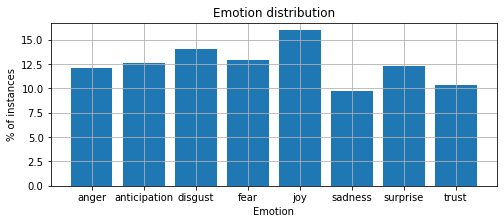

In [23]:
# the histogram of the data
labels = training_data_resampling_df['emotion'].unique()
post_total = len(training_data_resampling_df)
training_data_resampling_df1 = training_data_resampling_df.groupby(['emotion']).count()['cleaned_text']
training_data_resampling_df1 = training_data_resampling_df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(8,3))
plt.bar(training_data_resampling_df1.index,training_data_resampling_df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

By this approach, the distribution was indeed more balance. However, after conducting experiment I found that the advantage gained was less significant (f1 score not better than the case of using original train data to train the model) but the training time was longer because the number of train data was larger (1980912 vs 1455563). The reason is because repeating the data itself (oversampling of minority class) does not provide any extra information while undersampling of majority class loss some information. 

Therefore, I tried to oversampling the data by creating synthetic data points. This approach is very easy to be implemented in most cases such as using the SMOTE (Synthetic Minority Oversampling Technique). However, it's very challenging in NLP.

One of the method I found is using Google Translation(google trans python package): 

This is one of the useful techniques to expand the count of minority groups. By this approach, it translates the given sentence to ‘non-English’ language and then again translating to ‘English’. In this way, the significant details of the input message are maintained but the order of words / sometimes new words with similar meaning are introduced as a new record and thus boosting the count of insufficient class. Thus, I tried to implement it:

In [24]:
from googletrans import Translator

translator = Translator()

# Function to translate a given sentence to German
def German_translation(x):
    #print(x)    
    german_translation = translator.translate(x, dest='de')    
    return german_translation.text

# Function to translate a given sentence to Mandarin
def Mandarin_translation(x):
    #print(x)    
    mandarin_translation = translator.translate(x, dest='zh-CN')    
    return mandarin_translation.text

# Function to translate a given sentence to English
def English_translation(x):
    #print(x)    
    english_translation = translator.translate(x, dest='en')    
    return english_translation.text

In [25]:
# First, partition dataset according to their label
anger_text_df = train_df.loc[train_df.emotion == 'anger']
anger_text_df.reset_index(drop=True, inplace=True)

anticipation_text_df = train_df.loc[train_df.emotion == 'anticipation']
anticipation_text_df.reset_index(drop=True, inplace=True)

disgust_text_df = train_df.loc[train_df.emotion == 'disgust']
disgust_text_df.reset_index(drop=True, inplace=True)

fear_text_df = train_df.loc[train_df.emotion == 'fear']
fear_text_df.reset_index(drop=True, inplace=True)

sadness_text_df = train_df.loc[train_df.emotion == 'sadness']
sadness_text_df.reset_index(drop=True, inplace=True)

surprise_text_df = train_df.loc[train_df.emotion == 'surprise']
surprise_text_df.reset_index(drop=True, inplace=True)

trust_text_df = train_df.loc[train_df.emotion == 'trust']
trust_text_df.reset_index(drop=True, inplace=True)

Then, I tried to make the number of class 'anger' data becomes triple (original + English->German->English + English->Mandarin->English).

In [26]:
import requests.packages.urllib3
requests.packages.urllib3.disable_warnings()

new_generated_anger_text_1 = []
new_generated_anger_text_2 = []

for text in anger_text_df.text:
    x = German_translation(text)
    y = Mandarin_translation(text)
    Ger_Eng = English_translation(x)
    Man_Eng = English_translation(y)
    new_generated_anger_text_1.append(Ger_Eng)
    new_generated_anger_text_2.append(Man_Eng)

ConnectTimeout: timed out

As shown, the result shows that error will occur if I try to call many times of the google translator because the requests from TTS API is limited (I had tried many ways to deal with it but it ended with failure). Besides, it spent me a large amount of time (69min) to generate only thousands of re-translated sentence, thus it's impossible to implement it to the whole train dataset (resampling minority class) because the computational cost will be too large for a student like me. 

Therefore, I didn't balance the train data distribution in the end despite the above attempts, at least I learn something new to deal with imbalance data in NLP and gained some experiences. 

## **Feature Engineering**
### Using Bag of Words

In [27]:
import nltk

# Function for tokenization and stemming with nltk
def NLTK_preprocessing(text):
    # tokenization with nltk
    text = nltk.word_tokenize(text)

    # stemming with nltk 
    porter = nltk.stem.PorterStemmer()
    stem_data = [porter.stem(word) for word in text]
        
    return stem_data

Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model: 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words) (build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.)
# notice that stop words are removed
BOW = CountVectorizer(max_features=1000, tokenizer=NLTK_preprocessing, stop_words=nltk.corpus.stopwords.words('english')) 

# apply analyzer to training data
BOW.fit(train_df.cleaned_text)

train_data_BOW_features = BOW.transform(train_df.cleaned_text)

## check dimension
print(train_data_BOW_features.shape)

feature_names_BOW = BOW.get_feature_names_out()
print(feature_names_BOW[100:110])

c:\Users\JiaHe\DeepLearning_Project\deep_learning\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

c:\Users\JiaHe\DeepLearning_Project\deep_learning\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.



(1455563, 1000)
['boyfriend' 'brand' 'break' 'breakfast' 'breath' 'bring' 'bro' 'broke'
 'broken' 'brother']


Using scikit-learn ```TfidfVectorizer``` to convert a collection of raw documents to a matrix of TF-IDF and use these as features to train a model: 

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TFIDF, unigrams and bigrams
# notice that stop words are removed
TFIDF = TfidfVectorizer(max_features=5000, tokenizer=NLTK_preprocessing, stop_words=nltk.corpus.stopwords.words('english'), sublinear_tf=True, norm='l2')

# fit on our complete corpus
TFIDF.fit(train_df.cleaned_text)

train_data_TFIDF_features = TFIDF.transform(train_df.cleaned_text)

## check dimension
print(train_data_TFIDF_features.shape)

feature_names_TFIDF = TFIDF.get_feature_names_out()
print(feature_names_TFIDF[200:210])

c:\Users\JiaHe\DeepLearning_Project\deep_learning\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\JiaHe\DeepLearning_Project\deep_learning\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


(1455563, 5000)
['app' 'appal' 'appar' 'appeal' 'appear' 'appl' 'applaud' 'appli' 'applic'
 'appoint']


Notice that I defined a function to apply stemming to each word using ```nltk.stem.PorterStemmer()``` while tokenizing the words, that's why there's some tokenized words are in the weird form such as 'danc' because porter stemmer is not exactly correct, as taught in class. 

In this part of word embedding, I tried 2 bag of words methods, using ```CountVectorizer``` to perform word frequency and using ```TfidfVectorizer``` to convert a collection of raw documents to a matrix of TF-IDF. I compared the difference of these 2 methods to verify the advantages of using TF-IDF over only term frequency as features to train the model. I use a MLP model (without hyperparameter tuning) to conduct the experiment and the result (average validate(10-fold cross validation) f1 score) show me that TF-IDF is indeed better than simple TF, as taught in class.

Besides, I removed the stop words such as 'the' using ```nltk.corpus.stopwords.words('english')```. Similarly, I conducted experiment and confirmed that this removal can highlight the important features for the model and make the prediction better.

During trying different methods and parameters to increase the quality of prediction -> rank on Kaggle, I found that the higher the number of ```max_features``` (top max_features ordered by term frequency across the corpus) preserved, the better the quality of prediction (f1 score higher). It's reasonable since when we reduce the dimension of input data by setting the max_features, we might loss some unique identities of classified class too. Therefore, it seems that we should just keep the original number of features in training the model in order to get a high f1 score. However, I found that the time required to train will be very large if the number of features is higher, and the order of time increase is exponentially (verified by: someone just fed all features to train MLP model, without any data preprocessing beforehand and obtain a high f1 score on Kaggle, but the time spent is 5XXX minutes).

## **Classification Models**

### Split Train-Validate Data from train_df

Validation data is needed in order to verify that our trained model can work well. Actually, this step can be skipped because we can submit the prediction of test data onto Kaggle and we can know the f1 score there. However, since we can only submit at most 20 times a day, thus I think our own validation is still needed during model's hyperparameter tuning.

In [29]:
# Separate train data according to their label
data_label_anger = np.array(train_df.query("emotion == 'anger'"))
data_label_anticipation = np.array(train_df.query("emotion == 'anticipation'"))
data_label_disgust = np.array(train_df.query("emotion == 'disgust'"))
data_label_fear = np.array(train_df.query("emotion == 'fear'"))
data_label_joy = np.array(train_df.query("emotion == 'joy'"))
data_label_sadness = np.array(train_df.query("emotion == 'sadness'"))
data_label_surprise = np.array(train_df.query("emotion == 'surprise'"))
data_label_trust = np.array(train_df.query("emotion == 'trust'"))

# Shuffle each class's data before splitting train-validate data
np.random.shuffle(data_label_anger)
np.random.shuffle(data_label_anticipation)
np.random.shuffle(data_label_disgust)
np.random.shuffle(data_label_fear)
np.random.shuffle(data_label_joy)
np.random.shuffle(data_label_sadness)
np.random.shuffle(data_label_surprise)
np.random.shuffle(data_label_trust)

# 90% of each class of original train data to train model, 10% as validation usage
validate_size = 0.1

validate_data = np.concatenate((data_label_anger[:int(validate_size*len(data_label_anger)),:], data_label_anticipation[:int(validate_size*len(data_label_anticipation)),:], \
                                data_label_disgust[:int(validate_size*len(data_label_disgust)),:], data_label_fear[:int(validate_size*len(data_label_fear)),:], \
                                    data_label_joy[:int(validate_size*len(data_label_joy)),:], data_label_sadness[:int(validate_size*len(data_label_sadness)),:], \
                                        data_label_surprise[:int(validate_size*len(data_label_surprise)),:], data_label_trust[:int(validate_size*len(data_label_trust)),:]), axis=0)

training_data = np.concatenate((data_label_anger[int(validate_size*len(data_label_anger)):,:], data_label_anticipation[int(validate_size*len(data_label_anticipation)):,:], \
                                data_label_disgust[int(validate_size*len(data_label_disgust)):,:], data_label_fear[int(validate_size*len(data_label_fear)):,:], \
                                    data_label_joy[int(validate_size*len(data_label_joy)):,:], data_label_sadness[int(validate_size*len(data_label_sadness)):,:], \
                                        data_label_surprise[int(validate_size*len(data_label_surprise)):,:], data_label_trust[int(validate_size*len(data_label_trust)):,:]), axis=0)
np.random.shuffle(validate_data)
np.random.shuffle(training_data)

print("Shape of training data: ", training_data.shape)
print("Shape of validation data: ", validate_data.shape)

training_data_df = pd.DataFrame(training_data, columns=['tweet_id', 'text', 'emotion', 'cleaned_text'])
validate_data_df = pd.DataFrame(validate_data, columns=['tweet_id', 'text', 'emotion', 'cleaned_text'])

Shape of training data:  (1310012, 4)
Shape of validation data:  (145551, 4)


In [30]:
training_data_df.groupby(['emotion']).count()['text']

emotion
anger            35881
anticipation    224042
disgust         125191
fear             57600
joy             464416
sadness         174094
surprise         43857
trust           184931
Name: text, dtype: int64

In [31]:
validate_data_df.groupby(['emotion']).count()['text']

emotion
anger            3986
anticipation    24893
disgust         13910
fear             6399
joy             51601
sadness         19343
surprise         4872
trust           20547
Name: text, dtype: int64

### Train models
I tried MLP and different ML models (Random Forest, Multinomial Naive Bayes, Logistic Regression) to compare their performance. Besides, I also tried to implement ensemble technique (gather the prediction of each model and make voting) to get advantages from wisdom of crowds.

In [32]:
# standardize name (X, y)
X_train = TFIDF.transform(training_data_df.cleaned_text)
y_train = training_data_df['emotion']

X_validate = TFIDF.transform(validate_data_df.cleaned_text)
y_validate = validate_data_df['emotion']

## check dimension
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_validate.shape)
print('y_test.shape: ', y_validate.shape)

X_train.shape:  (1310012, 5000)
y_train.shape:  (1310012,)
X_test.shape:  (145551, 5000)
y_test.shape:  (145551,)


In [33]:
from sklearn import metrics

# Plotting confusion matrix for later evaluation
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

### MLP
Multilayer perceptron (MLP) is a field of artificial neural networks that simulates the models of biological brains to solve difficult computational tasks. In MLP, the building
block are artificial neurons that receive weighted input signals and produce an output signal using an activation function. I implemented it using ```sklearn.neural_network.MLPClassifier``` and obtained the "best" hyperparameters using trial-and-error by checking the result of validate data prediction. It might not be the best hyperparameters setting but I tried my best (I focused on the previous data analysis more than here since this is data mining courses).

MLP (TFIDF) : 
              precision    recall  f1-score   support

       anger       0.43      0.17      0.25      3986
anticipation       0.55      0.49      0.52     24893
     disgust       0.38      0.29      0.33     13910
        fear       0.51      0.34      0.41      6399
         joy       0.50      0.78      0.61     51601
     sadness       0.43      0.33      0.37     19343
    surprise       0.61      0.14      0.23      4872
       trust       0.47      0.23      0.31     20547

    accuracy                           0.49    145551
   macro avg       0.48      0.35      0.38    145551
weighted avg       0.49      0.49      0.46    145551

MLP Average Test F1 Score (TFIDF):  0.3785538065531287


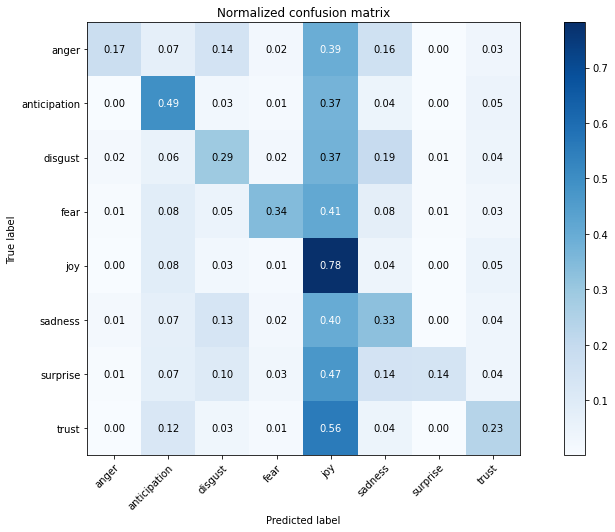

In [87]:
from sklearn.neural_network import MLPClassifier
import pickle

MLP = MLPClassifier(hidden_layer_sizes=(200,100,64), activation='relu', solver='adam', batch_size='auto',
                        learning_rate_init=0.001, max_iter = 400, tol=1e-3, random_state=1, early_stopping=True, epsilon=1e-8, verbose=False)

MLP.fit(X_train, y_train)

MLP_validate_predict = MLP.predict(X_validate)

print("MLP (TFIDF) : ")
print(metrics.classification_report(y_validate, MLP_validate_predict))
MLP_test_f1Score = metrics.f1_score(y_validate, MLP_validate_predict, average='macro')
print("MLP Average Validate F1 Score (TFIDF): ", MLP_test_f1Score)

# save to pickle file
# f = open('clf_mlp.pickle', 'wb')
# pickle.dump(MLP, f)
# f.close()

plot_confusion_matrix(y_validate, MLP_validate_predict, classes=['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust'], normalize=True, title='Normalized confusion matrix')
plt.show()

### Random Forest
The basic building block of random forest is the decision tree and random forest is just an ensemble of decision tree in short. Specifically, it uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. I implemented it using ```sklearn.ensemble.RandomForestClassifier```.

RF (TFIDF) : 
              precision    recall  f1-score   support

       anger       0.63      0.13      0.22      3986
anticipation       0.55      0.46      0.50     24893
     disgust       0.34      0.22      0.27     13910
        fear       0.63      0.25      0.36      6399
         joy       0.47      0.81      0.59     51601
     sadness       0.40      0.31      0.35     19343
    surprise       0.65      0.13      0.22      4872
       trust       0.50      0.19      0.28     20547

    accuracy                           0.47    145551
   macro avg       0.52      0.31      0.35    145551
weighted avg       0.49      0.47      0.44    145551

RF Average Validate F1 Score (TFIDF):  0.34910739473428976


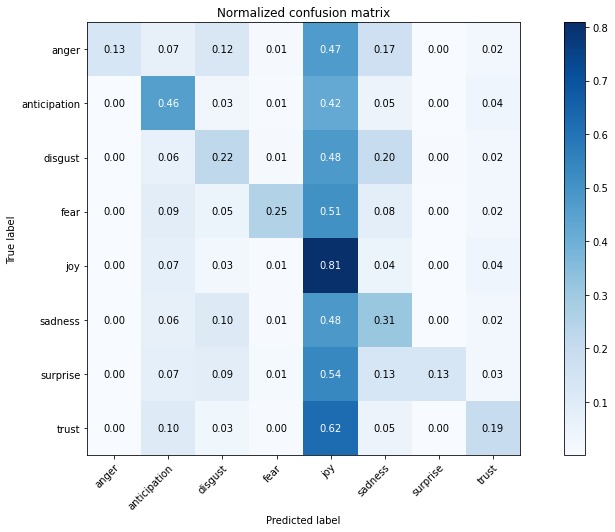

In [34]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=50)

RF.fit(X_train, y_train)

RF_validate_predict = RF.predict(X_validate)

print("RF (TFIDF) : ")
print(metrics.classification_report(y_validate, RF_validate_predict))
RF_validate_f1Score = metrics.f1_score(y_validate, RF_validate_predict, average='macro')
print("RF Average Validate F1 Score (TFIDF): ", RF_validate_f1Score)

# f = open('clf_RF.pickle', 'wb')
# pickle.dump(rf, f)
# f.close()

plot_confusion_matrix(y_validate, RF_validate_predict, classes=['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust'], normalize=True, title='Normalized confusion matrix')
plt.show()

### Multinomial Naive Bayes

MNB (TFIDF) : 
              precision    recall  f1-score   support

       anger       0.83      0.09      0.16      3986
anticipation       0.57      0.37      0.45     24893
     disgust       0.42      0.17      0.24     13910
        fear       0.80      0.19      0.30      6399
         joy       0.43      0.88      0.58     51601
     sadness       0.42      0.28      0.34     19343
    surprise       0.82      0.09      0.17      4872
       trust       0.56      0.09      0.15     20547

    accuracy                           0.46    145551
   macro avg       0.61      0.27      0.30    145551
weighted avg       0.51      0.46      0.40    145551

MNB Average Validate F1 Score (TFIDF):  0.29946847879577276


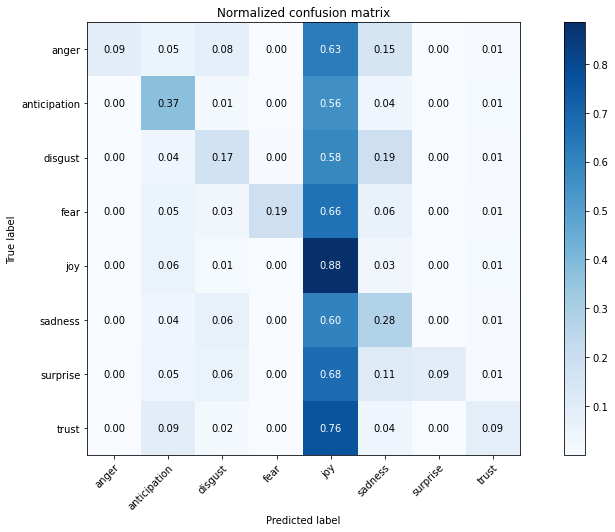

In [35]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()

MNB.fit(X_train, y_train)

MNB_validate_predict = MNB.predict(X_validate)

print("MNB (TFIDF) : ")
print(metrics.classification_report(y_validate, MNB_validate_predict))
MNB_validate_f1Score = metrics.f1_score(y_validate, MNB_validate_predict, average='macro')
print("MNB Average Validate F1 Score (TFIDF): ", MNB_validate_f1Score)

# f = open('New\clf_MNB.pickle', 'wb')
# pickle.dump(MNB, f)
# f.close()

plot_confusion_matrix(y_validate, MNB_validate_predict, classes=['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust'], normalize=True, title='Normalized confusion matrix')
plt.show()

### Logistic Regression

LR (TFIDF) : 
              precision    recall  f1-score   support

       anger       0.59      0.13      0.21      3986
anticipation       0.53      0.44      0.48     24893
     disgust       0.37      0.25      0.30     13910
        fear       0.64      0.24      0.35      6399
         joy       0.47      0.80      0.60     51601
     sadness       0.40      0.34      0.36     19343
    surprise       0.68      0.12      0.20      4872
       trust       0.48      0.17      0.25     20547

    accuracy                           0.47    145551
   macro avg       0.52      0.31      0.34    145551
weighted avg       0.48      0.47      0.43    145551

LR Average Validate F1 Score (TFIDF):  0.3438596742113885


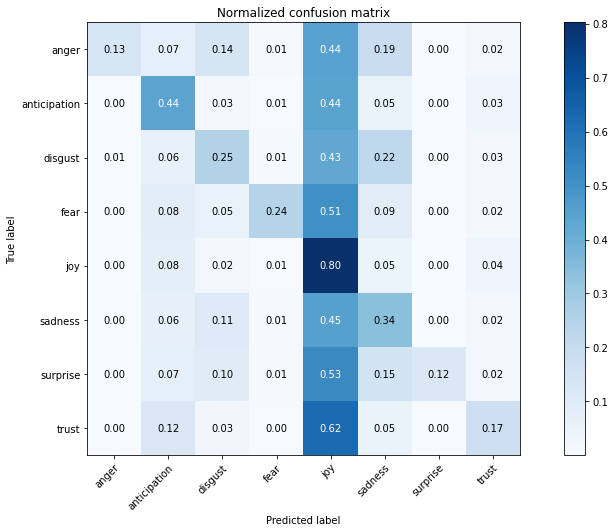

In [36]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)

LR.fit(X_train, y_train)

LR_validate_predict = LR.predict(X_validate)

print("LR (TFIDF) : ")
print(metrics.classification_report(y_validate, LR_validate_predict))
LR_validate_f1Score = metrics.f1_score(y_validate, LR_validate_predict, average='macro')
print("LR Average Validate F1 Score (TFIDF): ", LR_validate_f1Score)

# f = open('New\clf_LR.pickle', 'wb')
# pickle.dump(LR, f)
# f.close()

plot_confusion_matrix(y_validate, LR_validate_predict, classes=['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust'], normalize=True, title='Normalized confusion matrix')
plt.show()

### Ensemble
I implemented the simplest ensemble method (majority vote) from scratch. In short, a test data points will be classified according to the majority votes.

In [37]:
ensemble_validate_predict = list()
for MLP_predict, RF_predict, LR_predict in zip(MLP_validate_predict, RF_validate_predict, LR_validate_predict):
    if (MLP_predict == RF_predict) or (MLP_predict == LR_predict):
        ensemble_validate_predict.append(MLP_predict)
    else:
        ensemble_validate_predict.append(RF_predict)

print(metrics.classification_report(y_validate, ensemble_validate_predict))
print("ENSEMBLE F1 Score (Validate): ", metrics.f1_score(y_validate, ensemble_validate_predict, average='macro'))
print()

plot_confusion_matrix(y_validate, ensemble_validate_predict, classes=['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust'], normalize=True, title='Normalized confusion matrix')
plt.show()

NameError: name 'MLP_validate_predict' is not defined

I found that the performance of MLP was still the best compared to other models, even ensemble them will not better than MLP. I think the reason is because
there’s no complementarity between those models in this classification case.

I also tried to use Keras to build deep neural network as taught in lab 2. I found that a problem will be occurred if TF-IDF matrix is used as features to train the model due to the sparsity of data, thus I use CountVectorizer instead. Similarly, the result was not better than using MLP from sklearn, CountVectorizer instead of TF-IDF might be the reason.

## **Predict Test Data and Output**

In [ ]:
test_df['cleaned_text'] = data_cleaning(test_df)
test_data = TFIDF.transform(test_df.cleaned_text)
print('test_data.shape: ', test_data.shape)

Since MLP performed better, thus I pick it as my model.

In [ ]:
test_data_predict_MLP = MLP.predict(test_data)

# Format of output csv file 
test_data_predict_MLP_submission = {'id':test_df.tweet_id, 'emotion':test_data_predict_MLP}
test_data_predict_MLP_df = pd.DataFrame(test_data_predict_MLP_submission)
test_data_predict_MLP_df.to_csv("TestPredict\MLP\Resampling_Predict_13.csv", index=False)

## **Additional Discussions**

Notice that the above steps will not generate the same prediction as my final submission. To have a better explanation on my work developping, I tried to show most of my processes in completing this assignment, thus it doesn't mean that I used all of them in my final test, i.e, I didn't remove hashtags and emojis during data cleaning. 

As mentioned above, the higher the number of max_features in TfidfVectorizer, the better the result. However, the computation cost will be very expensive. Besides, I have also mentioned some attempts such as oversampling of minority classes using googletranslate to make the prediction better. However, I would say that those are not the real solution to have a better result in emotion classification since the real problem is the word representation, the word embedding part, as taught in class. To have a big improvement, more sophisticated methods such as Word2Vec/ Glove or even Language Model such as Transformer or BERT should be used to capture the semantic and context-specific meaning of word. Honestly, I found some materials on internet, such as codes written by others about using BERT in emotion classification, but it's shame to say that I'm still trying and it's hard for me to fully understand those codes in short time despite I understand the background theory since I'm new to this field and CS. 

However, I personally think that this assignment is indeed a good opportunity for the beginners to gain experience in NLP, even the part to extract useful data from raw data. I think I will try to implement those modern NLP techniques after final exam week. Last but not least, thanks for this semester teaching, it's a wonderful journey and I learnt a lot!